Fundamentals of Data Analysis Project

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
%matplotlib inline

In [198]:
# import the data set
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
# x = the entire dataset except for the last column
# y = the last column
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [199]:
# description of variables
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


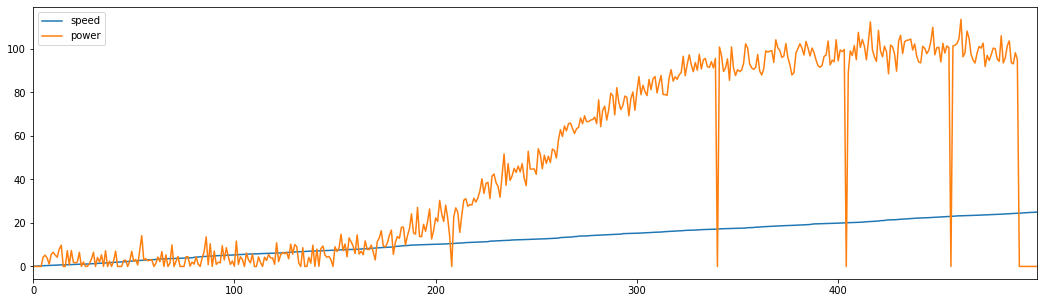

In [200]:
# plot the 2 variables (speed and power)
df.plot(figsize=(18,5));

In [201]:
# check if data set is clean (no null values)
df.isnull().values.any()

False

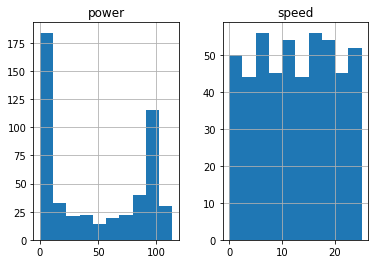

In [202]:
# histogram of power and speed distributions
df.hist();

In [203]:
# get first 5 figures of variables
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


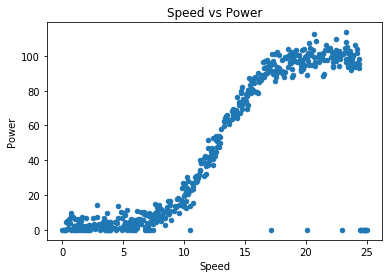

In [179]:
# plot speed vs power, naming x and y axis
df.plot(kind='scatter', x='speed', y='power', style='o')
plt.title('Speed vs Power')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show();

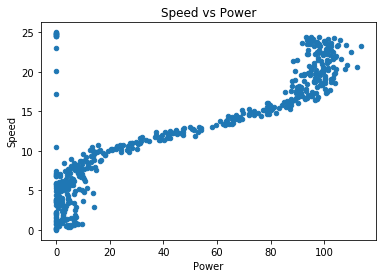

In [180]:
# plot power vs speed, axis reversed
df.plot(kind='scatter',x='power', y='speed', style='o')
plt.title('Speed vs Power')
plt.xlabel('Power')
plt.ylabel('Speed')
plt.show();

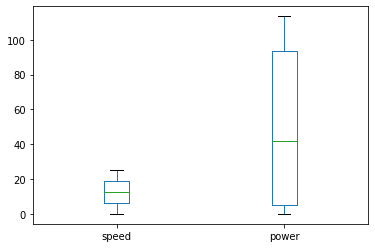

In [181]:
# box plot to show the difference in dispersion
df.plot(kind='box')
plt.show()

In [182]:
# highlighting the strong positive correlation
df.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


In [183]:
# split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [184]:
# set up the linear regression and fit the training data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
# predicting y data based on x test data
y_pred = regressor.predict(X_test)
y_pred

array([ 10.40860499,  48.63205052,  57.32631785,  96.16169099,
       100.32769408, -10.0493585 ,  65.04639644, 105.83993789,
        24.86478258,  23.76331291,  46.42421575,  47.89773741,
        82.32233641,  58.55506847,  28.17408704,  68.23331537,
       101.42916376,  73.50078814,  24.00808394,  -5.39381333,
        37.1131254 ,  76.43804062,  46.17944471,  14.32983704,
        -2.94610293,  94.81545027,  -8.94788882,  76.56042614,
        11.51007466,  44.46604743,  91.50614581,  15.9208488 ,
        16.89993296,  34.78780053,  78.27871884, 106.70153195,
        63.5777702 ,  97.63521264,  72.6440895 ,  45.93467367,
        66.88217923,  -2.70133189,  84.52527577,  41.2791285 ,
         5.50828877, -12.99150639,  39.07618914,  67.62138777,
        88.07935126,  12.9787009 ,  75.82611302,  27.80203506,
        71.29295337,  21.80024917,  19.47492429, -10.53890058,
        67.98854433,  28.78601464,  41.89105609,  71.17056785,
         5.75305981,  55.61292057,  81.58312787,  91.13

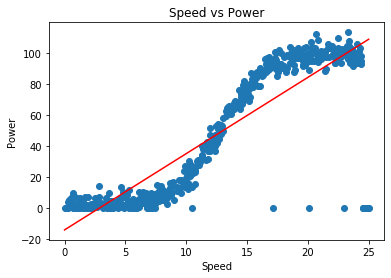

In [249]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title('Speed vs Power')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

In [187]:
# Calculate the coefficients
print(regressor.coef_)

[4.89542079]


In [188]:
# Calculate the Intercept
print(regressor.intercept_)

-13.603433993820211


In [189]:
# Calculate the r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7066904808136409

***

# Polynomial Regression

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
%matplotlib inline

In [217]:
# import the data set
df1 = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
# x = the entire dataset except for the last column
# y = the last column
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

df1

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


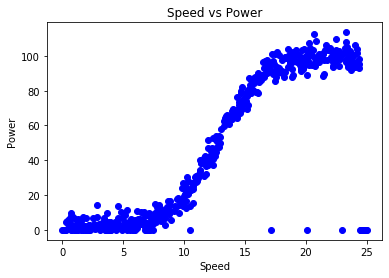

In [250]:
# plot speed vs power, naming x and y axis
plt.scatter(x, y, color='blue')
plt.title('Speed vs Power')
plt.xlabel('Speed')
plt.ylabel('Power');

In [219]:
# import PolynomialFeatures from sklearn
from sklearn.preprocessing import PolynomialFeatures

In [253]:
# fit a cubic curve (degree=3) 
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

In [254]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

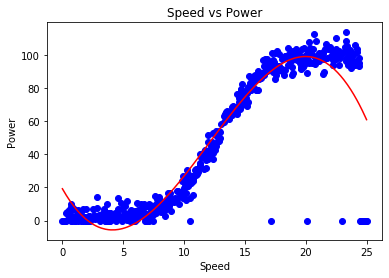

In [255]:
# plot speed vs power, naming x and y axis
# plot the new cubic best fit line
plt.scatter(x, y, color='blue')
plt.plot(x, y_poly_pred, color='red')
plt.title('Speed vs Power')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()


In [256]:
# Calculate the r2 value in order to compare accuracy vs linear model
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

14.419973610973681
0.8796883953739738
